In [1]:
import warnings
warnings.filterwarnings('ignore')

# Load Required Libraries

In [ ]:
#Load Libraries for Data Processing & Visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Load Libraries for Modelling
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import  variance_inflation_factor
from sklearn import metrics

import os

In [ ]:
path = r'D:\18-DS\Datasets-Kaggle\\'
print(path)

D:\18-DS\Datasets-Kaggle\\


# Analyse Data of Given Train & Test File

In [ ]:
df_train = pd.read_csv(path+ "Titanic-train.csv")

df_test = pd.read_csv(path+ "Titanic-test.csv")

In [ ]:
df_train.shape

(891, 12)

In [ ]:
df_test.shape

(418, 11)

In [ ]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df_train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
# Embarked Null Value with  "S"

In [ ]:
# Age Null Value with 29

In [ ]:
#158 Records with atleast 1 null values
df_train [ df_train.isna().sum(axis=1) >1 ].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q


C:\Users\admin\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


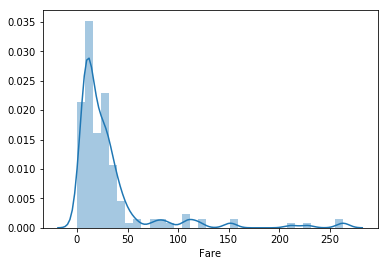

In [ ]:
sns.distplot(df_train.Fare [df_train.Age<20] )

# Approach 1 of Modelling. Create Categorical Variable for Age & Fare

## Prepare Data for Modelling

In [ ]:
df_train = pd.read_csv(path+ "Titanic-train.csv")

#Null Values Treatment of Variables
df_train['Embarked'] [ df_train['Embarked'].isna() ] = "S"
df_train['Age'] [df_train['Age'].isna()] =29

#Create Categorical Variables
df_train['Age_group']= pd.cut(df_train.Age, [0,5,10,20,30,40,50,60,80])
df_train['Fare_group']= pd.cut(df_train.Fare, [-1, 0, 5, 10, 15, 30, 50, 600])


C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


C:\Users\admin\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


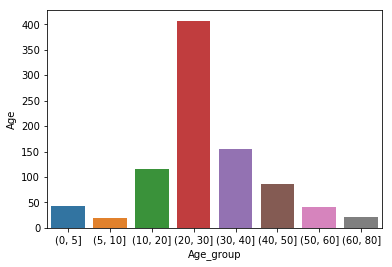

In [ ]:
#Distribution of Age
sns.barplot(x=df_train.Age_group, y=df_train.Age, estimator=len)

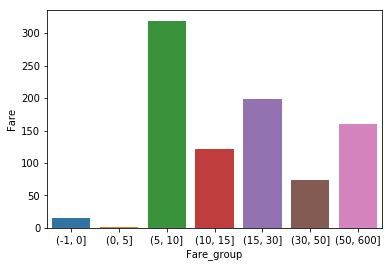

In [ ]:
sns.barplot(x=df_train.Fare_group, y=df_train.Fare, estimator=len)

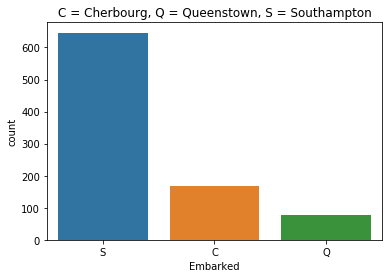

In [ ]:
p = sns.countplot(data=df_train, x='Embarked')
_ = plt.title('C = Cherbourg, Q = Queenstown, S = Southampton')

In [ ]:
#Decide what Variables to keep in train dataset
cols1= [ 'Survived', 'PassengerId', 'Pclass', 'Sex', 'SibSp','Parch','Embarked','Age_group','Fare_group']
df_train = df_train[cols1]

#Encoding of All Categorical Variables
df_train['Sex']= df_train['Sex'].apply(lambda x: 1 if x=="male" else 0)
Pclass1 = pd.get_dummies(df_train.Pclass, drop_first=True, prefix="PC_")
SibSp1 = pd.get_dummies(df_train.SibSp, drop_first=True, prefix="SS_")
Parch1 = pd.get_dummies(df_train.Parch, drop_first=True, prefix="P_")
Embarked1= pd.get_dummies(df_train.Embarked, drop_first=True, prefix="E_")
Age_group1= pd.get_dummies(df_train.Age_group, drop_first=True, prefix="Age_")
Fare_group1 = pd.get_dummies(df_train.Fare_group, drop_first=True, prefix="Fare_")

#Merge All Dummy Fiels in One Final Train Data
df_train = pd.concat([df_train,Pclass1,SibSp1,Parch1,Embarked1,Age_group1,Fare_group1], axis=1)
df_train.drop(['Pclass','SibSp','Parch','Embarked','Age_group','Fare_group'], inplace=True, axis=1)

#X, y Split of Given Data
y = df_train.pop("Survived")
X = df_train

# Train Test Split

In [ ]:
X_test1, X_train1, y_test1, y_train1= train_test_split(X, y, test_size=.30, train_size=70, random_state=40)

In [ ]:
cols=X_train1.columns

In [ ]:
def vif():
    X = X_train1[cols]
    vif = pd.DataFrame()
    vif['Feature']= X.columns
    vif['vif'] = [variance_inflation_factor(X.values,i) for i in range( X.shape[1]) ]
    vif['vif'] = round(vif['vif'],2)
    vif= vif.sort_values("vif",ascending=False)
    print (vif)

In [ ]:
def print_train_score():
    print ("R2 Score               :", round( metrics.r2_score       (y_true= y_train1,y_pred= y_train_result['Pred_Final']) ,3))
    print ("Recall/Senstivity Score:", round( metrics.recall_score   (y_true= y_train1,y_pred= y_train_result['Pred_Final']) ,3))
    print ("Precision Score        :", round( metrics.precision_score(y_true= y_train1,y_pred= y_train_result['Pred_Final']) ,3))
    print ("Accuracy Score         :", round( metrics.accuracy_score (y_true= y_train1,y_pred= y_train_result['Pred_Final']) ,3))
    print ("F1 Score               :", round( metrics.f1_score       (y_true= y_train1,y_pred= y_train_result['Pred_Final']) ,3))        

In [ ]:
def print_test_score():
    print ("R2 Score               :", round( metrics.r2_score       (y_true= y_test1,y_pred= y_test_result['Pred_Final'])       ,3))
    print ("Recall/Senstivity Score:", round( metrics.recall_score   (y_true= y_test1,y_pred= y_test_result['Pred_Final'])   ,3))
    print ("Precision Score        :", round( metrics.precision_score(y_true= y_test1,y_pred= y_test_result['Pred_Final']),3))
    print ("Accuracy Score         :", round( metrics.accuracy_score (y_true= y_test1,y_pred= y_test_result['Pred_Final']) ,3))
    print ("F1 Score               :", round( metrics.f1_score       (y_true= y_test1,y_pred= y_test_result['Pred_Final'])       ,3))
           

### Model with RFE

In [ ]:
logreg = LogisticRegression()
#30 Variables
rfe = RFE(logreg,30)
rfe = rfe.fit(X_train1, y_train1)

y_train_result = pd.DataFrame()
y_train_result['Actual'] = y_train1
y_train_result['Pred_Final'] = rfe.predict(X_train1)
print_train_score()
print ("--------------------------------")
y_test_result = pd.DataFrame()
y_test_result['Actual'] = y_test1
y_test_result['Pred_Final'] = rfe.predict(X_test1)
print_test_score()

R2 Score               : 0.34
Recall/Senstivity Score: 0.768
Precision Score        : 0.835
Accuracy Score         : 0.84
F1 Score               : 0.8
--------------------------------
R2 Score               : -0.053
Recall/Senstivity Score: 0.75
Precision Score        : 0.571
Accuracy Score         : 0.814
F1 Score               : 0.649


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [ ]:
logreg = LogisticRegression()
#with 5 Variables
rfe = RFE(logreg,5)
rfe = rfe.fit(X_train1, y_train1)

y_train_result = pd.DataFrame()
y_train_result['Actual'] = y_train1
y_train_result['Pred_Final'] = rfe.predict(X_train1)
print_train_score()
print ("--------------------------------")
y_test_result = pd.DataFrame()
y_test_result['Actual'] = y_test1
y_test_result['Pred_Final'] = rfe.predict(X_test1)
print_test_score()

cols =X_train1.columns [rfe.support_] 

### Model with Logistic Regression

In [ ]:
logreg = LogisticRegression()
lr=logreg.fit(X_train1, y_train1)

y_train_result = pd.DataFrame()
y_train_result['Actual'] = y_train1
y_train_result['Pred_Final'] = lr.predict(X_train1)
print_train_score()
print ("--------------------------------")
y_test_result = pd.DataFrame()
y_test_result['Actual'] = y_test1
y_test_result['Pred_Final'] = lr.predict(X_test1)
print_test_score()

R2 Score               : 0.34
Recall/Senstivity Score: 0.768
Precision Score        : 0.835
Accuracy Score         : 0.84
F1 Score               : 0.8
--------------------------------
R2 Score               : -0.053
Recall/Senstivity Score: 0.75
Precision Score        : 0.571
Accuracy Score         : 0.814
F1 Score               : 0.649


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## Model with statsmodel

In [ ]:
#Just for print Summary Table
lm = sm.GLM(y_train1, sm.add_constant(X_train1), family= sm.families.Binomial()).fit()

y_train_result = pd.DataFrame()
y_train_result['Actual'] = y_train1
y_train_result['Pred_Prob'] = lm.predict( sm.add_constant(X_train1) )
y_train_result['Pred_Final']= y_train_result['Pred_Prob'].apply(lambda x: 1 if x>.5 else 0)
print_train_score()
print ("--------------------------------")
y_test_result = pd.DataFrame()
y_test_result['Actual'] = y_test1
y_test_result['Pred_Prob'] = lm.predict( sm.add_constant(X_test1) )
y_test_result['Pred_Final']= y_test_result['Pred_Prob'].apply(lambda x: 1 if x>.5 else 0)
print_test_score()

#lm.summary()

R2 Score               : 0.34
Recall/Senstivity Score: 0.839
Precision Score        : 0.79
Accuracy Score         : 0.84
F1 Score               : 0.814
--------------------------------
R2 Score               : -0.134
Recall/Senstivity Score: 0.75
Precision Score        : 0.545
Accuracy Score         : 0.8
F1 Score               : 0.632


In [ ]:
#confusion Metrics of Train split of Train Data
confm = metrics.confusion_matrix(y_true= y_train1,y_pred= y_train_result['Pred_Final'])
TN = confm[0,0]
FP = confm[0,1]
FN = confm[1,0]
TP = confm[1,1]
print (confm)

[[131  25]
 [ 18  94]]


In [ ]:
#confusion Metrics of Test split of Train Data
confm = metrics.confusion_matrix(y_true= y_test1,y_pred= y_test_result['Pred_Final'])
TN = confm[0,0]
FP = confm[0,1]
FN = confm[1,0]
TP = confm[1,1]
print (confm)

[[44 10]
 [ 4 12]]


# Prepare for Prediction

In [ ]:
df_test = pd.read_csv(path+"Titanic-test.csv")

#Null Values Treatment of Variables
df_test['Embarked'] [ df_test['Embarked'].isna() ] = "S"
df_test['Age'] [df_test['Age'].isna()] =29

#Create Categorical Variables
df_test['Age_group']= pd.cut(df_test.Age, [0,5,10,20,30,40,50,60,80])
df_test['Fare_group']= pd.cut(df_test.Fare, [-1, 0, 5, 10, 15, 30, 50, 600])

#Decide what Variables to keep in train dataset
cols1= ['PassengerId', 'Pclass', 'Sex', 'SibSp','Parch','Embarked','Age_group','Fare_group']
df_test = df_test[cols1]

#Encoding of All Categorical Variables
df_test['Sex']= df_test['Sex'].apply(lambda x: 1 if x=="male" else 0)
Pclass1 = pd.get_dummies(df_test.Pclass, drop_first=True, prefix="PC_")
SibSp1 = pd.get_dummies(df_test.SibSp, drop_first=True, prefix="SS_")
Parch1 = pd.get_dummies(df_test.Parch, drop_first=True, prefix="P_")
Embarked1= pd.get_dummies(df_test.Embarked, drop_first=True, prefix="E_")
Age_group1= pd.get_dummies(df_test.Age_group, drop_first=True, prefix="Age_")
Fare_group1 = pd.get_dummies(df_test.Fare_group, drop_first=True, prefix="Fare_")

#Merge All Dummy Fiels in One Final Train Data
df_test = pd.concat([df_test,Pclass1,SibSp1,Parch1,Embarked1,Age_group1,Fare_group1], axis=1)
df_test.drop(['Pclass','SibSp','Parch','Embarked','Age_group','Fare_group'], inplace=True, axis=1)

X_test = df_test

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


# Predict on the Given Test Data

In [ ]:
# Score using on Kaggle is 0.77511

Titatic_Result = pd.DataFrame()
Titatic_Result['PassengerId'] =df_test['PassengerId']
Titatic_Result['Survived'] = lm.predict( sm.add_constant(X_test1) )

Titatic_Result.to_csv("gender_submission.csv")

# Approach 2 of Modelling- Use Advance Modelling Packages

In [ ]:
#load data in dataframe
df_train = pd.read_csv(path + "Titanic-train.csv")

#Test file for validation (final testing, result need to submitted to Kaggle with this. We do not know acutual results)
df_ftest = pd.read_csv(path + "Titanic-test.csv")

#Prepare Data
df_train["Sex"] = df_train["Sex"].fillna("NA")
df_train["Embarked"] = df_train["Embarked"].fillna("C")

df_ftest["Sex"] = df_ftest["Sex"].fillna("NA")
df_ftest["Embarked"] = df_ftest["Embarked"].fillna("C")

df_train[['Pclass', 'Age', 'SibSp', 'Fare']] = df_train[['Pclass', 'Age', 'SibSp', 'Fare']].fillna(0)
df_ftest[['Pclass', 'Age', 'SibSp', 'Fare']] = df_ftest[['Pclass', 'Age', 'SibSp', 'Fare']].fillna(0)

genders = {'male': 0, 'female': 1, 'NA': 2}
embarks = {'C': 0, 'Q': 1, 'S': 2,}

df_train['Sex'] = df_train['Sex'].apply(lambda x: genders[x])
df_train['Embarked'] = df_train['Embarked'].apply(lambda x: embarks[x])

df_ftest['Sex'] = df_ftest['Sex'].apply(lambda x: genders[x])
df_ftest['Embarked'] = df_ftest['Embarked'].apply(lambda x: embarks[x])

cols=['Pclass', 'Sex', 'Age', 'SibSp', 'Embarked', 'Fare']

X_train = df_train[cols]
y_train = df_train['Survived']


#Scale Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train[cols] = sc.fit_transform(X_train)

#Train - Test Split
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_train, y_train, test_size=0.2, random_state=40)

X_train1.head()

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\admin\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


,Pclass,Sex,Age,SibSp,Embarked,Fare
661,0.827377,-0.737695,0.921217,-0.474545,-1.929248,-0.502949
393,-1.566107,1.355574,-0.045450,0.432793,-1.929248,1.632335
266,0.827377,-0.737695,-0.443489,3.154809,0.589375,0.150674
144,-0.369365,-0.737695,-0.329764,-0.474545,0.589375,-0.416873
446,-0.369365,1.355574,-0.614078,-0.474545,0.589375,-0.255795
